# Multi-layer perceptron classification

In [59]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import importlib
import time
from scipy import optimize

import activation_functions as activation
import mlp
import trainer 
import dataset

importlib.reload(mlp)
importlib.reload(activation)
importlib.reload(trainer)
importlib.reload(dataset)

<module 'dataset' from '/home/reafle/study/python/jupyter/mlp/dataset.py'>

## Iris dataset
As a demo of mlp, lets classify the famous Iris set
Data loading:

In [2]:
iris = dataset.Iris()    

iris.trainingData, iris.trainingDataResult = iris.scanInputFile('../../iris.txt')
iris.testData, iris.testDataResult = iris.scanInputFile('../../iris-test.txt')

print (iris.trainingData.shape)
print (iris.trainingDataResult.shape)

(135, 4)
(135, 3)


Classification:

In [31]:

#result = nn.propagate(iris.trainingData)
#target = np.array(iris.trainingDataResult)
#print("Weights : %s" % nn.getParams())
#print("Target : %s , Result : %s" % (target, result))
#print("Cost : %s" % nn.cost(iris.trainingData, iris.trainingDataResult))
#print("CostPrime : \n%s \n%s" % nn.costPrime(iris.trainingData, iris.trainingDataResult))


Training NN:

In [125]:
np.random.seed()
nn = mlp.MLP(bias=False)
t = trainer.Trainer(nn)
start = time.time()
t.train(iris.trainingData, iris.trainingDataResult, epochs=1000, eta=0.003, method="BFGS")
print(time.time() - start)

optimizing by BFGS
Optimization terminated successfully.
         Current function value: 67.496928
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
0.0018625259399414062


In [30]:
actual = nn.propagate(iris.testData)

print("input : %s " % iris.testData)
print("expected : %s " % iris.testDataResult)
print("actual : %s " % actual)

input : [[ 0.71641791  0.78947368  0.25925926  0.13043478]
 [ 0.76119403  1.          0.2962963   0.08695652]
 [ 0.68656716  0.84210526  0.25925926  0.08695652]
 [ 0.79104478  0.97368421  0.27777778  0.08695652]
 [ 0.74626866  0.86842105  0.25925926  0.08695652]
 [ 0.85074627  0.78947368  0.77777778  0.52173913]
 [ 0.85074627  0.76315789  0.77777778  0.56521739]
 [ 0.92537313  0.76315789  0.7962963   0.56521739]
 [ 0.76119403  0.65789474  0.55555556  0.47826087]
 [ 0.85074627  0.73684211  0.75925926  0.56521739]
 [ 1.          0.78947368  0.96296296  1.        ]
 [ 0.94029851  0.65789474  0.92592593  0.82608696]
 [ 0.97014925  0.78947368  0.96296296  0.86956522]
 [ 0.92537313  0.89473684  1.          1.        ]
 [ 0.88059701  0.78947368  0.94444444  0.7826087 ]] 
expected : [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0

## Double half-moon experiment

Lets generate one more training data set, this time in 2d

In [155]:
def getMoonData(step, numSamples, strategy='slow') :
    mgen = dataset.Moon()
    if strategy=='slow' :
        c1, c2 = mgen.getSlow(step, numSamples)
    elif strategy=='fast' :
        c1, c2 = mgen.getFast(step, numSamples)
    elif strategy=='noise' :
        c1, c2 = mgen.getNoise(step, numSamples)
    
    c1Result = np.zeros([len(c1), 1])
    c2Result = np.ones([len(c2), 1])
    
    # Normalize and convert to NN input format
    trainData = dataset.normalize(np.vstack((c1,c2)))
    trainResult = np.vstack((c1Result, c2Result))
    
    return c1, c2, c1Result, c2Result, trainData, trainResult

In [181]:
### Seed random with test data. Seed is used to get constant random points
step = 45

numSamples=50
np.random.seed(step*100)

# Dataset 
c1, c2, c1Result, c2Result, trainData, trainResult = getMoonData(strategy='fast', step=step, numSamples=numSamples)

print("Data info:")
print("shapes training : %s    %s " % ( trainData.shape, trainResult.shape))
print("c1[0] : %s   %s " % ( c1[0], c1Result[0]))
print("c2[0] : %s   %s " % ( c2[0], c2Result[0]))
print("trainData[0] : %s   %s " % ( trainData[0], trainResult[0]))

Data info:
shapes training : (57, 2)    (57, 1) 
c1[0] : [ 1.79597915 -1.21628055]   [ 0.] 
c2[0] : [ 2.9802733  -5.55101293]   [ 1.] 
trainData[0] : [ 0.36343049 -0.12291188]   [ 0.] 


Test data visualized:

In [182]:
plt.clf()

plt.plot([point[0] for point in c1], [point[1] for point in c1], 'ro')
plt.plot([point[0] for point in c2], [point[1] for point in c2], 'bo')
plt.grid(1)
plt.legend(['Class 1', 'Class 2'], numpoints=1)

plt.grid(1)
plt.show()

In [176]:
af = activation.Activation()
nn1 = mlp.MLP(2,16,1, weightInit='uniform', seed=3, bias=True)
t1 = trainer.Trainer(nn1)

Viena treniravimo iteracija

<IPython.core.display.Javascript object>


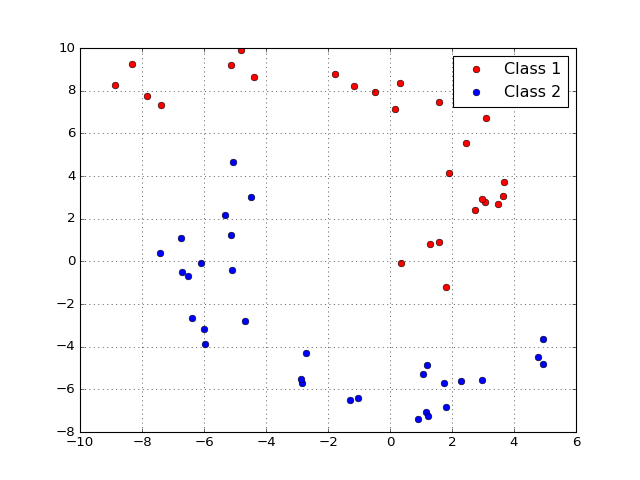

optimizing by BFGS
Optimization terminated successfully.
         Current function value: 0.000423
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


In [180]:
plt.clf()
t1.train(trainData, trainResult, epochs=200, tolerance=1e-3, eta=0.3, method='BFGS')
plt.plot(range(len(t1.j_)), t1.j_, lineWidth=2, label='Step X')
#plt.title("BFGS method, Fast dataset, L2=6, a(x) = sigmoid")
    
plt.xlabel("Epoch")
plt.xlabel("Errors")
plt.show()

## Multi-training

<IPython.core.display.Javascript object>


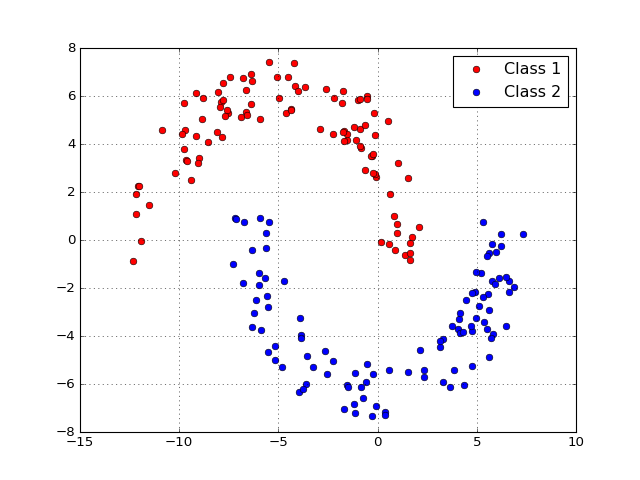

In [154]:
plt.clf()

_dataset='fast'
_method='CG'
_w = 'normal'
_act='sigmoid'
_meas = 3
steps = [5,10,15,20,30]

for i in (range(_meas)) :
    nn = mlp.MLP(2,6,1, bias=True, weightInit=_w, activation=_act, seed=1)
    t = trainer.Trainer(nn)
    for s in steps :
        _, _, _, _, trainData, trainResult = getMoonData(strategy=_dataset, step=s, numSamples=numSamples)
        t.train(trainData, trainResult, epochs=50, tolerance=1e-3, eta=0.3, method=_method, disp=False)
    plt.plot(range(len(t.j_)), t.j_, lineWidth=2, label='Step X')    
        
plt.title("NN=%d, Method=%s, %s, a(x)=%s, W=%s" % (_meas, _method, _dataset, _act, _w) )
plt.xlabel("Epoch")
plt.ylabel("Errors")
plt.show()

In [326]:
nn.propagate(trainData)

In [27]:
nn1 = mlp.MLP(2,10,1, seed=1, bias=True, weightInit='uniform') 
nn2 = mlp.MLP(2,10,1, seed=1, bias=True, weightInit='uniform') 
nn3 = mlp.MLP(2,10,1, seed=4, bias=True, weightInit='uniform') 
nn4 = mlp.MLP(2,10,1, seed=1, bias=True, weightInit='uniform') 
t1 = trainer.Trainer(nn1)
t2 = trainer.Trainer(nn2)
t3 = trainer.Trainer(nn3)
t4 = trainer.Trainer(nn4)
errors = {}
print(nn3.w1_)

[[ 0.96702984  0.54723225  0.97268436  0.71481599  0.69772882  0.2160895
   0.97627445  0.00623026  0.25298236  0.43479153  0.77938292]
 [ 0.19768507  0.86299324  0.98340068  0.16384224  0.59733394  0.0089861
   0.38657128  0.04416006  0.95665297  0.43614665  0.94897731]
 [ 0.78630599  0.8662893   0.17316542  0.07494859  0.60074272  0.16797218
   0.73338017  0.40844386  0.52790882  0.93757158  0.52169612]]


In [233]:
#nn = mlp.MLP(2, 4, 1)

t1.train(trainData, trainResult, epochs=200, tolerance=1e-3, method='BFGS')
errors['bfgs'] = t1.j_

t2.train(trainData, trainResult, epochs=200, tolerance=1e-3, method='L-BFGS-B')
errors['lbfgsb'] = t2.j_

t3.train(trainData, trainResult, epochs=200, tolerance=1e-3, method='Newton-CG')
errors['newtoncg'] = t3.j_

t4.train(trainData, trainResult, epochs=200, tolerance=1e-3, method='CG')
errors['cg'] = t4.j_


optimizing by BFGS
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 151
         Function evaluations: 175
         Gradient evaluations: 175
optimizing by L-BFGS-B
optimizing by Newton-CG
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 54
         Function evaluations: 74
         Gradient evaluations: 855
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.005395
         Iterations: 64
         Function evaluations: 137
         Gradient evaluations: 137


We can plot our training progress!

<IPython.core.display.Javascript object>


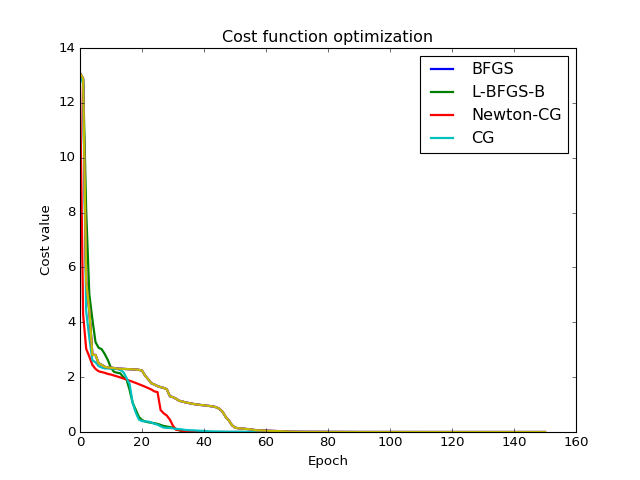

In [234]:
plt.clf()
plt.title('Cost function optimization')
plt.plot(range(len(errors['bfgs'])), errors['bfgs'], lineWidth=2)
plt.plot(range(len(errors['lbfgsb'])), errors['lbfgsb'], lineWidth=2)
plt.plot(range(len(errors['newtoncg'])), errors['newtoncg'], lineWidth=2)
plt.plot(range(len(errors['cg'])), errors['cg'], lineWidth=2)
plt.legend(['BFGS', 'L-BFGS-B', 'Newton-CG', 'CG'])
plt.xlabel("Epoch")
plt.ylabel("Cost value")
#plt.axis([0, len(errors['cg']), 0, 50])
plt.show()

## Classification of test data:

In [104]:
# Re-seed the random and repeat for test data
np.random.seed()
numSamples = 100
c1,c2 = getMoonData(step, numSamples)
c1Result = np.zeros([len(c1), 1])
c2Result = np.ones([len(c2), 1])

# Normalize and convert to NN input format
testData = dataset.normalize(np.vstack((c1,c2)))
testResult = np.vstack((c1Result, c2Result))

print("Data info : %s    %s " % ( testData.shape, testResult.shape))

FAST : degrees 0, numSamples 100
Data info : (122, 2)    (122, 1) 


In [184]:
actual = nn.propagate(trainData)
print (trainData.shape)
for i in range(5) :
    index = np.random.randint(0, len(trainData))
    print("Test data: %s" % trainData[index])
    print("Expected: %s" % trainResult[index])
    print("Got: %s" % actual[index])

(57, 2)
Test data: [ 0.24152728 -0.49339496]
Expected: [ 1.]
Got: [ 0.99550136]
Test data: [ 0.32082926  0.75505863]
Expected: [ 0.]
Got: [ 0.00045958]
Test data: [ 0.46164622 -0.5650053 ]
Expected: [ 1.]
Got: [ 0.99995188]
Test data: [ 0.73857844  0.30814603]
Expected: [ 0.]
Got: [ 0.85491123]
Test data: [-1.23354777 -0.0056783 ]
Expected: [ 1.]
Got: [ 0.99621224]


# Car fuel consumption experiment (regression)

In [ ]:
mpg = dataset.Car()

mpg.trainData, mpg.trainDataResult = mpg.scanInputFile('../../auto-mpg-train.data')
mpg.testData, mpg.testDataResult = mpg.scanInputFile('../../auto-mpg-test.data')
print ("Data shapes : %s  %s" % (mpg.trainData.shape, mpg.trainDataResult.shape))
print ("Data[0] : %s  %s" % (mpg.trainData[2], mpg.trainDataResult[2]))

In [ ]:
# 1 input, 1 output, 10 hidden units
nn = mlp.MLP(7,10,1)

In [ ]:
t = trainer.Trainer(nn)
t.train(mpg.testData, mpg.testDataResult, epochs=100, tolerance=1e-5, method='Newton-CG')
t.optimizationResults

In [ ]:
plt.clf()
plt.plot(range(len(t.j_)), t.j_, lineWidth=2)
plt.show()

In [ ]:
actual = nn.propagate(mpg.testData)

for i in range(5) :
    index = np.random.randint(0, len(mpg.testData))
    print("Test data: %s" % mpg.testData[index])
    print("Expected: %s" % mpg.testDataResult[index])
    print("Got: %s, error : %s " % (actual[index], nn.cost(mpg.testData[index], mpg.testDataResult[index])))

In [ ]:
plt.clf()
plt.plot(trainData, trainResult, 'bo')
plt.plot(trainData, nn.propagate(trainData), 'ro')
plt.legend(['Expected', 'Actual'], numpoints=1)

# Activation functions

In [483]:
af = activation.Activation()
val = 1

print(af.tanh(val))
print(af.tanhPrime(val))

0.761594155956
0.419974341614


<IPython.core.display.Javascript object>


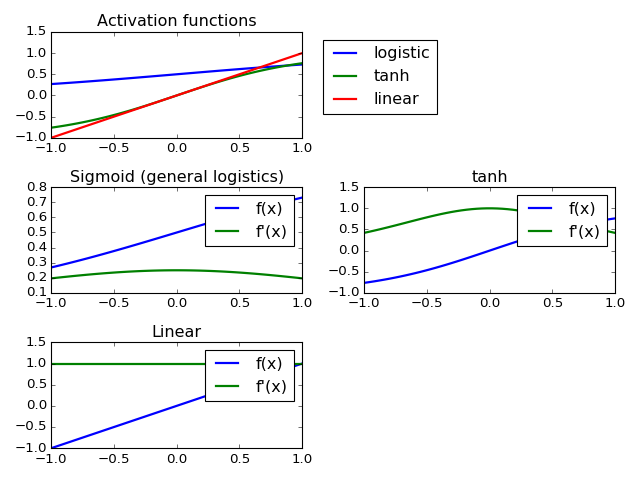

In [485]:
af = activation.Activation()
#points = np.linspace(-1.5,2.5)
points = np.linspace(-1,1)

plt.clf()


# all together
plt.subplot(321)
plt.title("Activation functions")
plt.axis([-1,1,-1,1.5])
plt.plot(points, af.sigmoid(points), lineWidth=2)
plt.plot(points, af.tanh(points), lineWidth=2)
plt.plot(points, af.linear(points), lineWidth=2)
plt.legend(['logistic', 'tanh', 'linear'], loc=2, bbox_to_anchor=(1.05, 1))


# sigmoid
plt.subplot(323)
plt.title("Sigmoid (general logistics)")
plt.plot(points, af.sigmoid(points), lineWidth=2)
plt.plot(points, af.sigmoidPrime(points), lineWidth=2)
plt.legend(['f(x)', 'f\'(x)'])


# tanh
plt.subplot(324)
plt.axis([-1,1,-1,1.5])
plt.title("tanh")
plt.plot(points, af.tanh(points), lineWidth=2)
plt.plot(points, af.tanhPrime(points), lineWidth=2)
plt.legend(['f(x)', 'f\'(x)'])

# linear
plt.subplot(325)
plt.title("Linear")
plt.axis([-1,1,-1,1.5])
plt.plot(points, af.linear(points), lineWidth=2)
plt.plot(points, af.linearPrime(points), lineWidth=2)
plt.legend(['f(x)', 'f\'(x)'])

plt.tight_layout()
plt.show()

## Testing

In [142]:
X = np.array([[1,1]])
y = np.array([[1]])

nn = mlp.MLP(2,2,1, bias=False, seed=1, debug=False)
yHat=nn.propagate(X)
print("yHat = %s" % yHat)

print("======================")

X = np.array([[1]])
y = np.array([[1]])

nn = mlp.MLP(1,1,1, bias=True, seed=1, debug=False)
yHat=nn.propagate(X)
print("yHat = %s" % yHat)



print("Cost : %s " % (nn.cost(X, y), ) )
print("CostPrime : %s " % (nn.costPrime(X, y), ) )
print("Params : %s " % (nn.getParams(), ) )
print("Gradients %s" % (nn.computeGradients(X,y), ) )

yHat = [[ 0.57163772]]
yHat = [[ 0.62370029]]
Cost : 0.0708007372229 
CostPrime : (array([[-0.01434811,  0.02682844],
       [-0.01434811,  0.02682844]]), array([[-0.08831688],
       [-0.01381901]])) 
Params : [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387 ] 
Gradients [-0.01434811  0.02682844 -0.01434811  0.02682844 -0.08831688 -0.01381901]


In [143]:
t = trainer.Trainer(nn)
t.train(X, y, epochs=1, method='BFGS')

optimizing by BFGS
Optimization terminated successfully.
         Current function value: 0.070801
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [141]:
def computeNumericalGradient(N, X, y):
        if N.bias == True and X.shape[1] != N.l1_:
            X = np.insert(X, obj=[0], values=[1], axis=1)
            
        print("computeNumericalGradient : X.shape = %s " % (X.shape, ))
        
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.cost(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.cost(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

NN = mlp.MLP(1,1,1, bias=False, activation='sigmoid', seed=1)
X=np.array([[1]])
y=np.array([[1]])

print(NN)
numgrad = computeNumericalGradient(NN, X, y)
print('numgrad=%s' % numgrad)

grad = NN.computeGradients(X,y)
print('grad=%s' % grad)



np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

NN (1, 1, 1)             w1 : [[ 1.62434536]]             w2 : [[-0.61175641]]             bias : False 
computeNumericalGradient : X.shape = (1, 1) 
numgrad=[ 0.01232311 -0.12237564]
grad=[ 0.01232311 -0.12237564]


3.9749426084139958e-10

In [283]:
a = np.array([[2,3],[3,4],[4,5]])
b = np.array([[1]])
for item in a :
    item[0] = 0
#np.put(a, , [[0]])
a

array([[0, 3],
       [0, 4],
       [0, 5]])